<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='15'><b> Machine Learning - PCA </b></font> <br>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'></h4>

---

# <a name="section1"></a> <font color='#347B98'> 1. Dimension Reduction and PCA
    
#### Table of Contents

1. Understanding PCA
  - [1.1 - Calculating covariance matrix](#section1.1)
  - [1.2 - Eigenvalue Decomposition](#section1.2)
  - [1.3 - Selecting Principal Components](#section1.3)
  - [1.4 - Calculating Expained Variance](#section1.4)
  - [1.5 - Constructing the Projection Matrix](#section1.5)
  - [1.6 - Dimension Reduction](#section1.6)
  - [1.7 - Visualizing Projected Dimension Space](#section1.7)
  
2. [PCA with Sklearn](#section2)

Dimensionality reduction is the transformation of high dimensional data into a meaningful representation of reduced dimensionality. In many real applications such as face recognition, text categorization, and image segmentation, the dimensionality of data is very high, to deals with such high dimensional data we need to reduce it without loss of information. 

Many dimensionality reduction approaches have been proposed among that Principal Component Analysis (PCA) is one of the most popular methods which have been widely used in many classification applications. For example, in face recognition eigenfaces is based on **principal component analysis (PCA)** for dimensionality reduction and extracting personal features.

Principal Component Analysis (PCA) is an unsupervised dimensionality reduction method. It seeks to reduce the dimension of the data by finding a few orthogonal linear combinations (the principal components PCs) of the original variables with the largest variance. As per the number of the original variables there are as many PCs. The first several PCs explain most of the variance, so that disregarded the rest can be with minimal loss of information, for many datasets. To reduce the dimensionality of the huge data along with retaining as much information as possible in the original dataset, PCA is used. 

In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information

<img src="https://s3.amazonaws.com/weclouddata/images/python/pca.png" width="30%">  


[PCA Visual Explanation](http://setosa.io/ev/principal-component-analysis/)
<img src='https://s3.amazonaws.com/weclouddata/images/python/pca_visual_1.png' width='70%'>


### Dataset 
The Iris dataset consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a `150x4` numpy.ndarray. The rows being the samples and the columns being: `Sepal Length, Sepal Width, Petal Length and Petal Width`. The below plot uses the first two features.


<img src="https://s3.amazonaws.com/weclouddata/images/python/iris.png" width="40%">              


In [23]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']


In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## <a name="section1.1"></a> $\Delta$ <font color='#559E54'> 1.1 - Step 1 - Calculating Covariance Matrix

The classic approach to PCA is to perform the eigen decomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

<img src="https://s3.amazonaws.com/weclouddata/images/python/pca_covariance.png" width="40%">              


We can summarize the calculation of the covariance matrix via the following matrix equation:
<img src="https://s3.amazonaws.com/weclouddata/images/python/pca_covariance_2.png" width="30%">              


where X is the mean vector 
<img src="https://s3.amazonaws.com/weclouddata/images/python/pca_covariance_3.png" width="10%">              


The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

**Matrix-Matrix Multiplication**
<img src='https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg' width='.5'>


### $\delta$ 1.1.1 - Covariance with Numpy

In [25]:
import numpy as np
print('NumPy covariance matrix: \n %s' % np.cov(X.T))

NumPy covariance matrix: 
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### $\delta$ 1.1.2 - Covariance implementation

In this step, try to implement your own calculation of covariance and compare the results to numpy output

In [26]:
X.shape

(150, 4)

In [27]:
mean_vec = np.mean(X, axis=0)
mean_vec

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [28]:
import numpy as np

mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


## <a name="section1.2"></a> <font color='#559E54'> $\Delta$ 1.2 - Step 2 - Applying Eigen-value Decomposition on the Covariance Matrix

Next, we perform an eigendecomposition on the covariance matrix. Note that eigenvalue decomposition takes covariance matrix or correlation matrix as the input


**Eigenvectors** and **Eigenvalues** exist in pairs: every eigenvector has a corresponding eigenvalue. 

#### An eigenvector is a direction
> the eigenvector was the direction of the line (vertical, horizontal, 45 degrees etc.) . 

#### An eigenvalue is a number, telling you how much variance there is in the data in that direction. 
> the eigenvalue is a number telling us how spread out the data is on the line. The eigenvector with the highest eigenvalue is therefore the principal component.


<img src='https://s3.amazonaws.com/weclouddata/images/python/pca.gif' width='70%'>

In this step, you need to leverage the "np.linalg.eig" function and apply it on the covariance matrix. Put the `eig_values` and `eigenvectors` into two variables

In [29]:
### Numpy eigenvalue decomposition

eig_vals, eig_vecs = np.linalg.eig(cov_mat)


In [30]:
print('Eigenvectors \n {}'.format(eig_vecs))
print('Eigenvalues \n {}'.format(eig_vals))

print(eig_vecs.shape)

Eigenvectors 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
Eigenvalues 
 [4.22484077 0.24224357 0.07852391 0.02368303]
(4, 4)


## <a name="section1.3"></a> <font color='#559E54'> 1.3 - Step 3 - Selecting Principal Components
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1. In order to decide which eigenvector can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.


##### Select the principal components

Now that we have an eigenvector (4x4) we can select the top k to reduce dimensions. In this step, we need to rank order eigenvectors by eigenvalues in descending order and select the top K eigenvector as principal components

In [31]:
### Sort eigenvalues by descending order with their corresponding eigenvectors
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
4.224840768320109
0.24224357162751506
0.07852390809415462
0.023683027126001302


## <a name="section1.4"></a> <font color='#559E54'> 1.4 - Step 4 - Calculate Explained Variance

After sorting the eigen pairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called **"explained variance**, which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.


##### Calculate cumulative explained variance
For example, say the eigenvalue vector (after sorting) looks like below
$[4, 2, 1.5, 0.5]$

the highest eigenvalue is $4$ and total eigenvalue sum equals to $4+2+1.5+0.5$, then the explained variance of first principal component is $4 / 8 = 0.5$

In this step, implement cumulative explained variance calculation, so that we end up with a new vector:
$[0.5, 0.75, 0.9375, 1.0]$

In [32]:
### Calculate explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print (cum_var_exp)


[ 92.46162072  97.7631775   99.48169145 100.        ]


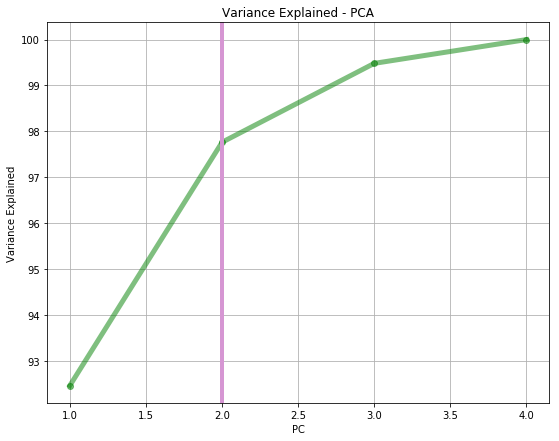

In [33]:
# Plot variance explained
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,7))
plt.plot(range(1, X.shape[1]+1), cum_var_exp, 'bo-', alpha=0.5, c='green', lw=5)
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.title('Variance Explained - PCA')
plt.axvline(2, lw=4, color='#D696D3')
plt.show()

## <a name="section1.5"></a> <font color='#559E54'> 1.5 - Step 5 - Construct the projection matrix
The next step is to construct the projection matrix that will be used to transform the Iris data onto the new feature subspace. 
Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our $d×k$-dimensional eigenvector matrix W. 


In [55]:
# set the number of components to keep
n_components = 2


# Build the projection matrix (top-2 eigenvectors concatenated into a projection matrix)
matrix_w = np.array([x[1] for x in eig_pairs[:n_components]]).T
print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


## <a name="section1.6"></a> <font color='#559E54'> 1.6 - Step 6 - Projection onto the Low-dimensional Subspace
In this last step we will use the $4×2$-dimensional projection matrix $W$ to transform our samples onto the new subspace via the equation $Y=X×W$, where $Y$ is a 150×2 matrix of our transformed samples.


##### Take the original iris matrix X and dot product with the projection matrix to project the original matrix onto a lower-dimensional subspace

In [56]:
### Projecting origianl space onto 2-D Subspace

X_transformed = X.dot(matrix_w)

In [57]:
X_transformed.shape
X_transformed

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829],
       [ 3.23144574, -6.06250644],
       [ 2.69045242, -5.23261922],
       [ 2.8848611 , -5.48512908],
       [ 2.62338453, -4.7439257 ],
       [ 2.83749841, -5.20803203],
       [ 3.00481631, -5.96665874],
       [ 2.89820038, -5.33624436],
       [ 2.72390912, -5.08698354],
       [ 2.28614265, -4.81144382],
       [ 2.86779988, -6.50091863],
       [ 3.12747377, -6.65947808],
       [ 2.88881689, -6.13281341],
       [ 2.86302037, -5.6338604 ],
       [ 3.31226514, -6.19396782],
       [ 2.92399691, -5.83519737],
       [ 3.2008114 , -5.71259155],
       [ 2.96810819, -5.75475549],
       [ 2.2954854 , -5.4563393 ],
       [ 3.20821456, -5.42024641],
       [ 3.15517201, -5.28351414],
       [ 3.00342587, -5.17566739],
       [ 3.0422871 , -5.45261105],
       [ 2.94895215, -5.68940829],
       [ 2.87152183,

## <a name="section1.7"></a> <font color='#559E54'> 1.7 - Visualization Transformed Data

Text(0.5,1,'Original Data')

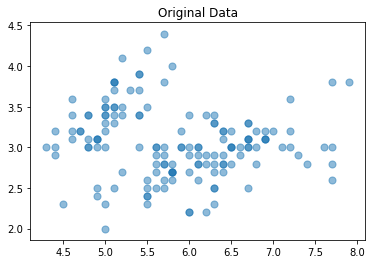

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5);
plt.title('Original Data')

Text(0.5,1,'PCA Transformed')

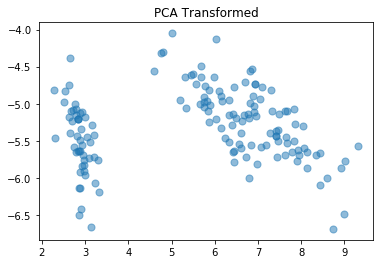

In [59]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=50, alpha=0.5);
plt.title('PCA Transformed')

---

# <a name='section2'> </a><font color='#347B98'> 2. Principal Component Analysis with Sklearn

## $\Delta$ 2.1 - Load iris data

In [60]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

# Load iris data
X = sklearn.datasets.load_iris().data
X.shape
X[0,:]

array([5.1, 3.5, 1.4, 0.2])

## $\Delta$ 2.2 - Standardize

> Standardization of your numeric column is recommended for PCA

In [61]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## $\Delta$ 2.3 - Fit PCA transformer

In [62]:
# Fit PCA
pca = sklearn.decomposition.PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [64]:
X_std[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [65]:
X_std.std(axis=0)

array([1., 1., 1., 1.])

In [66]:
X_std.mean(axis=0)

array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15])

## $\Delta$ 2.4 - Apply the PCA transformer

In [67]:
X_transformed_sk = pca.transform(X_std)
X_transformed_sk[:10]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657],
       [-2.23384186,  0.24761393, -0.08257446,  0.02550516],
       [-2.34195768, -1.09514636,  0.1535624 ,  0.02679383],
       [-2.18867576, -0.44862905, -0.24655952,  0.0399073 ]])

Text(0.5,1,'Original Data')

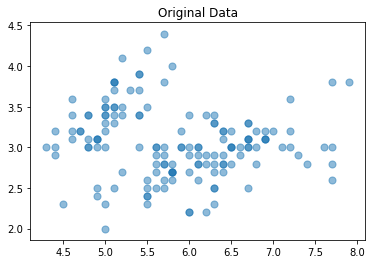

In [68]:
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5);
plt.title('Original Data')

Text(0.5,1,'PCA Transformed')

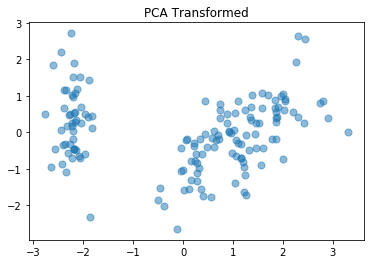

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_transformed_sk[:, 0], X_transformed_sk[:, 1], s=50, alpha=0.5);
plt.title('PCA Transformed')

## $\Delta$ 2.5 - Reconstruction original data

In [48]:
X_std[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

##### If we use all the PCs to reconstruct the original data, we get exactly the same data as what we put into the PCA transformer

In [49]:
# Select components and reconstruct
nComp = 4
Xhat = np.dot(X_transformed_sk[:,:nComp], pca.components_[:nComp,:])

mu = np.mean(X_std, axis=0)
Xhat += mu
print(Xhat[:10])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


##### If we use reduced PCs to reconstruct the original data, we will only get approximated original data

In [50]:
# Select components and reconstruct
nComp = 2
Xhat = np.dot(pca.transform(X_std)[:,:nComp], pca.components_[:nComp,:])

mu = np.mean(X_std, axis=0)
Xhat += mu
print(Xhat[:10])

[[-0.99464948  1.06443573 -1.30560624 -1.24776881]
 [-1.33390869 -0.05714369 -1.2265688  -1.22297912]
 [-1.35552506  0.32884265 -1.38309889 -1.36017238]
 [-1.41786717  0.07428633 -1.35146108 -1.3409175 ]
 [-0.99660128  1.25363164 -1.37425242 -1.30697852]
 [-0.51620615  1.95078853 -1.17147437 -1.07178148]
 [-1.24980914  0.71310207 -1.42000663 -1.37844378]
 [-1.07470438  0.81747392 -1.29320617 -1.24728778]
 [-1.63111533 -0.39685376 -1.38437415 -1.39627698]
 [-1.31033493  0.16116699 -1.28164028 -1.26728661]]
